| <h1> Assignment 7.1  | <h1> Classifications and Regression </h1> |
|--- | --- |
**Name:** Jomarie Dupaya
**Course and Section:** CPE019, CPE32S3 <br>
**Instructor:** Engr. Roman Richard
**Date Performed:** 4/3/24
**Date Submitted:** 2/11/24

<hr>

#**Classification**

**Dataset:**
Breast Cancer Wisconsin

**Dataset Link:** https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

Based on the article of the dataset the problem trying to solve is to classifify the findings of individuals that has abnomalities in the breast which can lead to breast cancer.

In [ ]:
pip uninstall tensorflow

In [ ]:
pip install tensorflow==2.12.0

In [21]:
!pip install scikeras

In [82]:
import pandas as pd
import numpy as np

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)

# Combine X and y into one DataFrame
data = pd.concat([X, y], axis=1)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

**Reamarks:** The data has missing values in Bare_nuclei Feature which will part of the cleaning process in the EDA.

##Cleaning and Exploratory Data Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

In [6]:
# Check for missing values in features
missing_values = X.isnull().sum()
print("Missing Values in Features:")
print(missing_values)

# Check for missing values in target
missing_values_target = y.isnull().sum()
print("Missing Values in Target:")
print(missing_values_target)

Missing Values in Features:
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64
Missing Values in Target:
Class    0
dtype: int64


In [7]:
# Fill missing values in features with mean value
X.fillna(X.mean(), inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  699 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


<ipython-input-7-3eb05db537f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [8]:
# Summary statistics of features
print("Summary Statistics of Features:")
print(X.describe())

# Summary statistics of target
print("Summary Statistics of Target:")
print(y.describe())

Summary Statistics of Features:
       Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
count       699.000000               699.000000                699.000000   
mean          4.417740                 3.134478                  3.207439   
std           2.815741                 3.051459                  2.971913   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
count         699.000000                   699.000000   699.000000   
mean            2.806867                     3.216023     3.544656   
std             2.855379                     2.214300     3.6018

**Remarks:** The statistical data shows that there is a big gap between 75% and max values which means an outlier removal must be used.

In [9]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]

# Remove outliers from features (X) and target (y)
X_cleaned = remove_outliers(X)
y_cleaned = y.loc[X_cleaned.index]

In [10]:
# Summary Statistics after removing outliers

print("Summary Statistics of Features:")
print(X_cleaned.describe())

print("Summary Statistics of Target:")
print(y_cleaned.describe())

Summary Statistics of Features:
       Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
count       504.000000               504.000000                504.000000   
mean          3.422619                 1.803571                  1.976190   
std           2.211924                 1.817495                  1.910375   
min           1.000000                 1.000000                  1.000000   
25%           1.000000                 1.000000                  1.000000   
50%           3.000000                 1.000000                  1.000000   
75%           5.000000                 2.000000                  2.000000   
max          10.000000                10.000000                 10.000000   

       Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
count         504.000000                   504.000000   504.000000   
mean            1.623016                     2.269841     2.208493   
std             1.370212                     1.008218     2.6333

**Remarks:** After removing outliers in the data there are differences in the values but still a large gap is present in the statistical reading.

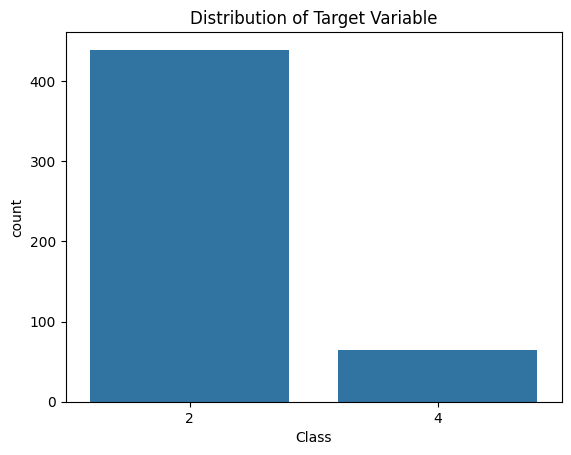

In [11]:
# Distribution of Target Variable
sns.countplot(x=y_cleaned.iloc[:, 0])
plt.title("Distribution of Target Variable")
plt.show()

**Remarks:** Based on the distribution of target variable that most of the data are class 2 in breast cancer, which means those who are in class 2 may be in suspicion of an abnomalities, while class 4 are minimal.

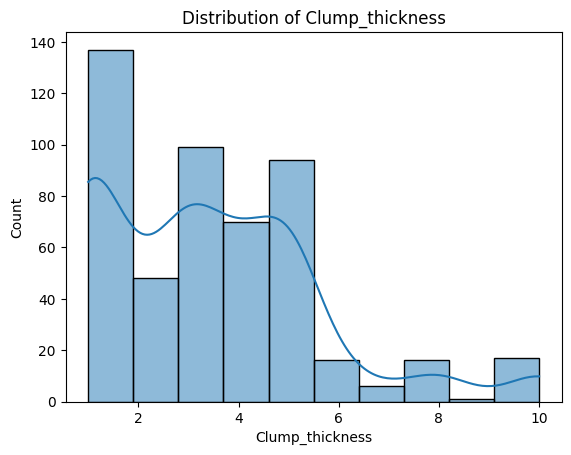

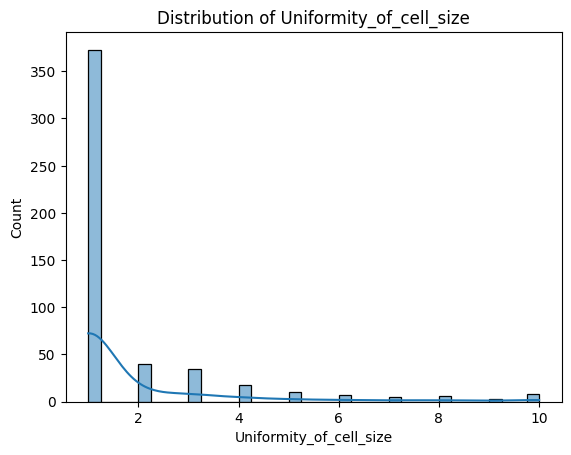

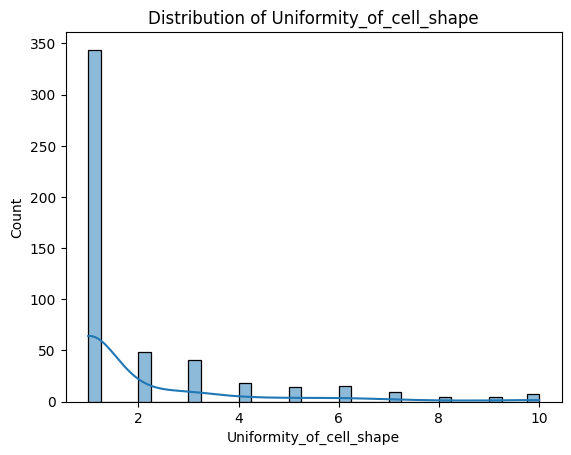

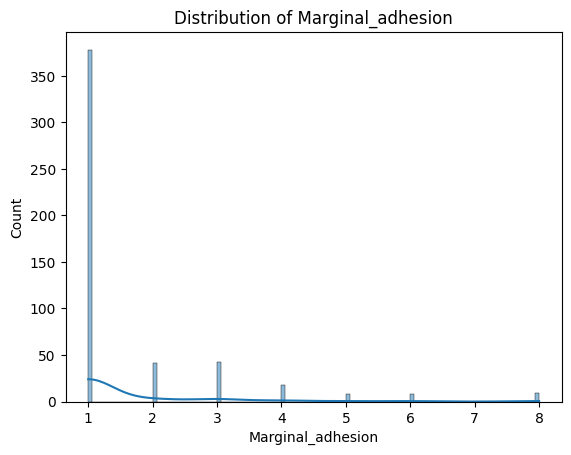

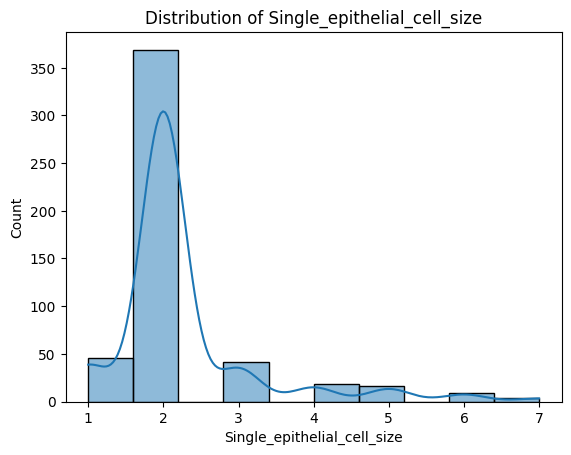

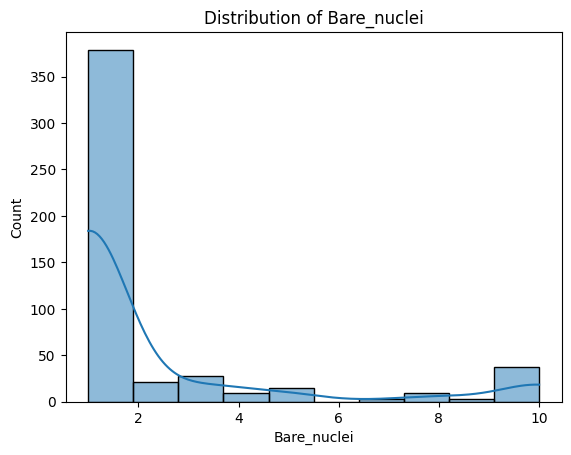

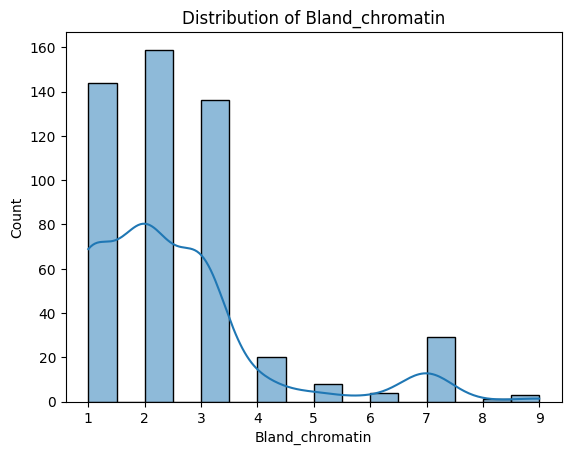

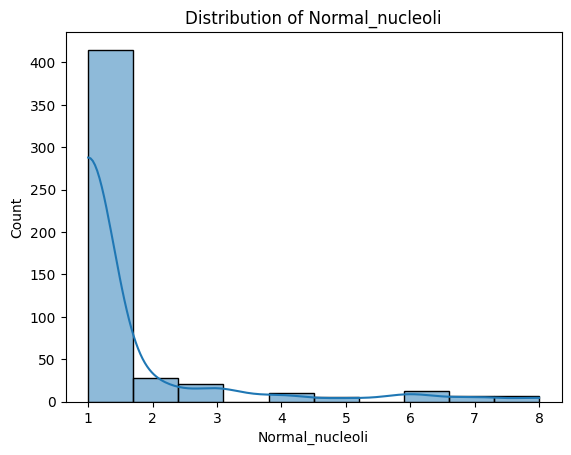

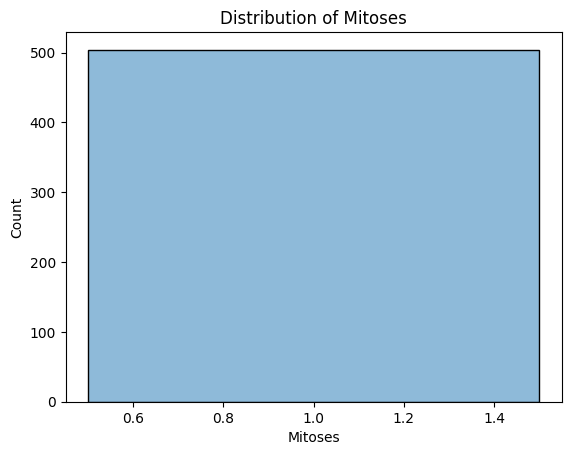

In [12]:
# Distribution of Features
for column in X_cleaned.columns:
    sns.histplot(x=X_cleaned[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

**Remarks:** Based on the distribution of the feature variables most of the data are in between 0-4 in read rating, which means that the data that surround the features are mostly likely in the class 2.

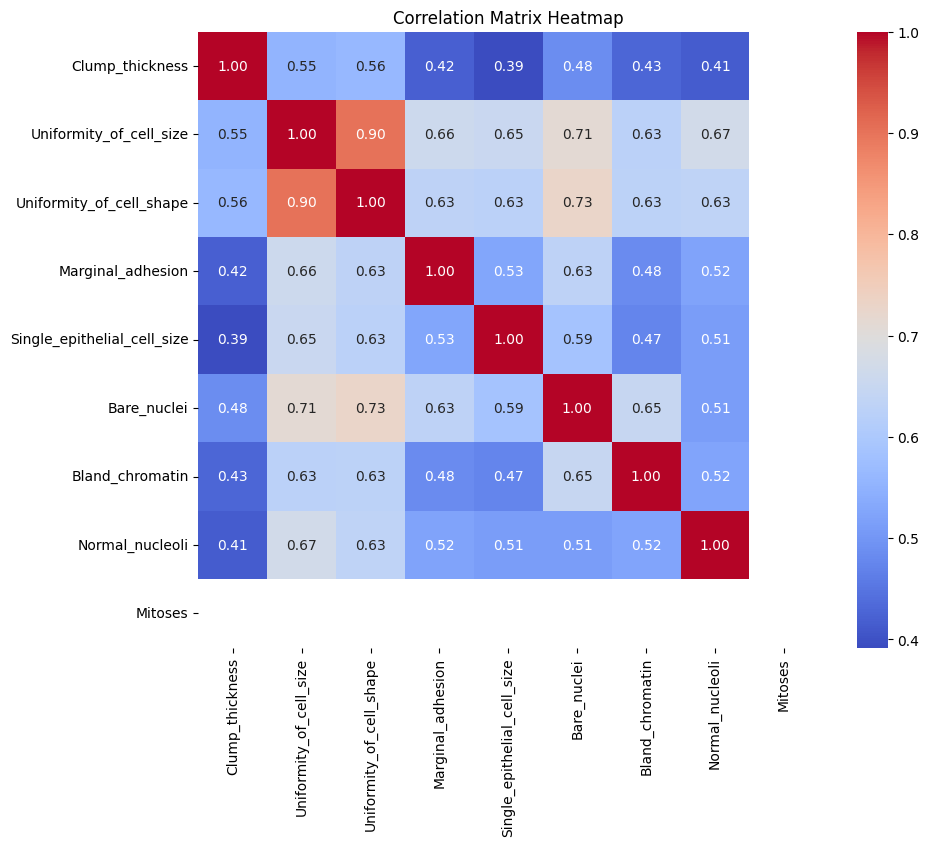

In [13]:
# Correlation Analysis
correlation_matrix = X_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#Separate features and target variable
X = X_cleaned.drop(['Mitoses', 'Marginal_adhesion','Single_epithelial_cell_size', 'Normal_nucleoli','Clump_thickness','Bland_chromatin'], axis=1)
y = y_cleaned['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature importance
#Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#Get feature importances
feature_importances = rf.feature_importances_

#Create DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature importance:")
print(feature_importance_df)

Feature importance:
                    Feature  Importance
2               Bare_nuclei    0.373678
1  Uniformity_of_cell_shape    0.313804
0   Uniformity_of_cell_size    0.312518


**Remarks:** The highest positive correlation on this data is the Uniformity_of_cell_size and Uniformity_of_cell_shape, and Bare_nuclei.

In [15]:
print(X_cleaned.shape)
print(y_cleaned.shape)

(504, 9)
(504, 1)


##Classification Modeling

In [16]:
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.losses import CategoricalCrossentropy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [17]:
def baseline_model():
    # Create model
    model = Sequential()
    model.add(Dense(5, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

<ipython-input-18-75c899ebfb90>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)


Epoch 1/200
73/73 [==============================] - 1s 2ms/step - loss: 0.6788 - accuracy: 0.8646
Epoch 2/200
73/73 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.8646
Epoch 3/200
73/73 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.8646
Epoch 4/200
73/73 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.8646
Epoch 5/200
73/73 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.8646
Epoch 6/200
73/73 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.8702
Epoch 7/200
73/73 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.9365
Epoch 8/200
73/73 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.9503
Epoch 9/200
73/73 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.9586
Epoch 10/200
73/73 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9641
Epoch 11/

In [19]:
mean_accuracy = results.mean() * 100
std_accuracy = results.std() * 100
print("Accuracy: %.2f%% (%.2f%%)" % (mean_accuracy, std_accuracy))

Accuracy: 96.77% (3.36%)


**Remarks:** Based on the models output and reapeted training data results shows a around 95% score on accuracy which means that the modeling is succeful in classifying the class of breast cancer according to the dataset.

#Regression

**Dataset:**
Concrete Compressive Strength

**Dataset Link:** https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

The problem is to solve the strength of concrete through the features of a concrete and to solve it through a regression how long it can last on different data.

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X2 = concrete_compressive_strength.data.features
y2 = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)

##Cleaning and Exploratory Data Analysis

In [87]:
# Check for missing values in features
missing_values = X2.isnull().sum()
print("Missing Values in Features:")
print(missing_values)

# Check for missing values in target
missing_values_target = y2.isnull().sum()
print("Missing Values in Target:")
print(missing_values_target)

Missing Values in Features:
Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
dtype: int64
Missing Values in Target:
Concrete compressive strength    0
dtype: int64


In [88]:
# Fill missing values in features with mean value
X2.fillna(X.mean(), inplace=True)
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


<ipython-input-88-b2d9f7625fbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2.fillna(X.mean(), inplace=True)


In [89]:
# Summary statistics of features
print("Summary Statistics of Features:")
print(X2.describe())

# Summary statistics of target
print("Summary Statistics of Target:")
print(y2.describe())

Summary Statistics of Features:
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  
count       1030.000000       1030.000000     1030.000000  1030.000000  
mean           6.204660        972.918932      773.580485    45.662136  
std            5.973841         77.753954       80.175980    63.169912  
min            0.000000        801.000000      594.000000     1

In [90]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]

# Remove outliers from features (X) and target (y)
X_cleaned2 = remove_outliers(X2)
y_cleaned2 = y2.loc[X_cleaned2.index]

X_cleaned3 = remove_outliers(X_cleaned2)
y_cleaned3 = y_cleaned2.loc[X_cleaned2.index]

X_cleaned4 = remove_outliers(X_cleaned3)
y_cleaned4 = y_cleaned3.loc[X_cleaned3.index]

X_cleaned5 = remove_outliers(X_cleaned4)
y_cleaned5 = y_cleaned4.loc[X_cleaned4.index]

In [114]:
# Summary statistics of features
print("Summary Statistics of Features:")
print(X_cleaned5.describe())

# Summary statistics of target
print("Summary Statistics of Target:")
print(y_cleaned5.describe())

Summary Statistics of Features:
           Cement  Blast Furnace Slag     Fly Ash       Water  \
count  763.000000          763.000000  763.000000  763.000000   
mean   271.342726           72.729096   62.334993  179.065793   
std     97.839806           85.348462   64.250382   17.478538   
min    108.300000            0.000000    0.000000  127.000000   
25%    188.100000            0.000000    0.000000  164.900000   
50%    255.000000           20.000000   77.000000  181.700000   
75%    338.450000          144.450000  121.500000  192.000000   
max    540.000000          342.100000  200.100000  228.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate         Age  
count        763.000000        763.000000      763.000000  763.000000  
mean           6.675491        971.101048      782.784273   23.142857  
std            5.215753         77.448379       61.624854   15.493773  
min            0.000000        801.000000      636.000000    1.000000  
25%            0.00000

In [115]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_normalized)
X_standardized = min_max_scaler.transform(X_normalized)
X_standardized_df = pd.DataFrame(X_standardized, columns=X_cleaned5.columns)
print(X_standardized_df.describe())

           Cement  Blast Furnace Slag     Fly Ash       Water  \
count  763.000000          763.000000  763.000000  763.000000   
mean     0.377676            0.212596    0.311519    0.515503   
std      0.226638            0.249484    0.321091    0.173055   
min      0.000000            0.000000    0.000000    0.000000   
25%      0.184851            0.000000    0.000000    0.375248   
50%      0.339819            0.058462    0.384808    0.541584   
75%      0.533125            0.422245    0.607196    0.643564   
max      1.000000            1.000000    1.000000    1.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate         Age  
count        763.000000        763.000000      763.000000  763.000000  
mean           0.302058          0.494480        0.506677    0.402597  
std            0.236007          0.225141        0.212720    0.281705  
min            0.000000          0.000000        0.000000    0.000000  
25%            0.000000          0.374419        0.382

In [116]:
min_max_scaler.fit(y_cleaned5.values.reshape(-1, 1))
y_standardized = min_max_scaler.transform(y_cleaned5.values.reshape(-1, 1))
y_standardized_df = pd.DataFrame(y_standardized, columns=y_cleaned5.columns)
print(y_standardized_df.describe())

       Concrete compressive strength
count                     763.000000
mean                        0.386389
std                         0.206738
min                         0.000000
25%                         0.234387
50%                         0.367791
75%                         0.500504
max                         1.000000


**Remarks:** Standardizing and normalizing the data to bring it close to 0 and 1

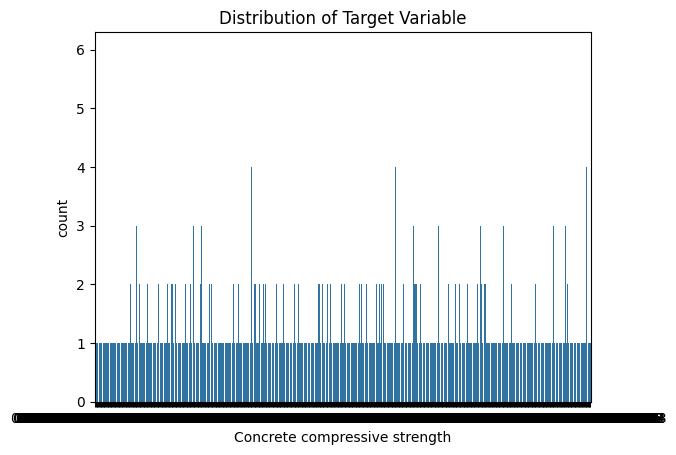

In [100]:
# Distribution of Target Variable
sns.countplot(x=y_standardized_df.iloc[:, 0])
plt.title("Distribution of Target Variable")
plt.show()

**Remarks:** The distribution of the target varibale is somewhat almost equally divided to each other with some has higher counts than the other.

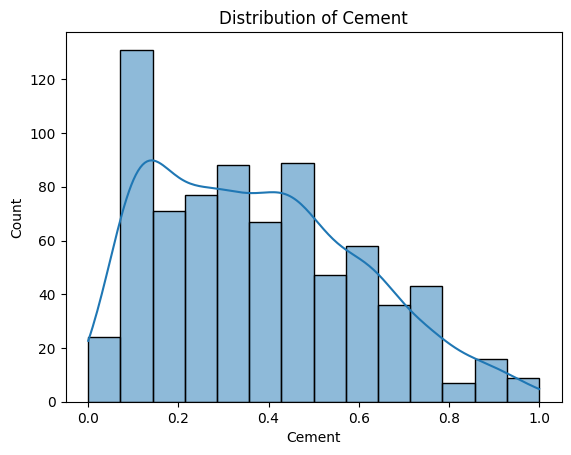

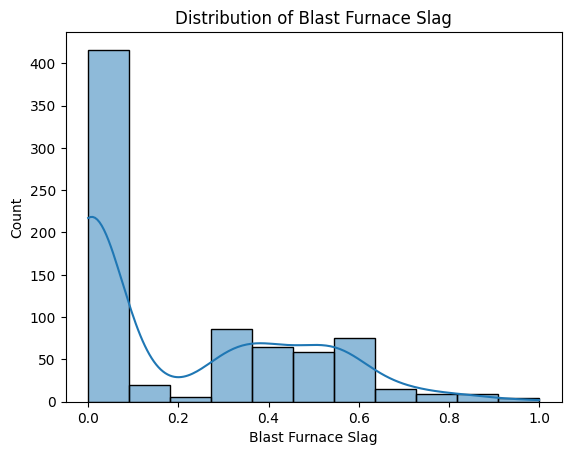

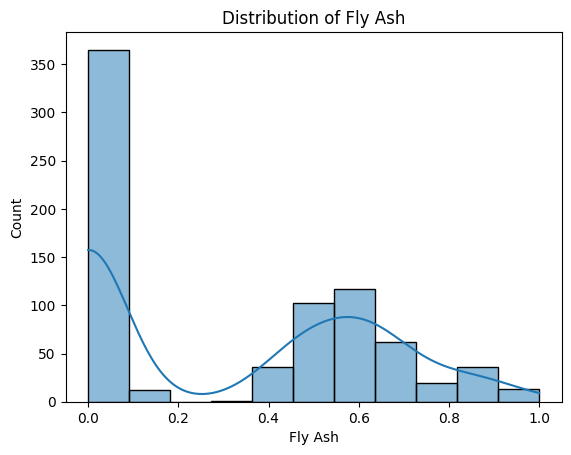

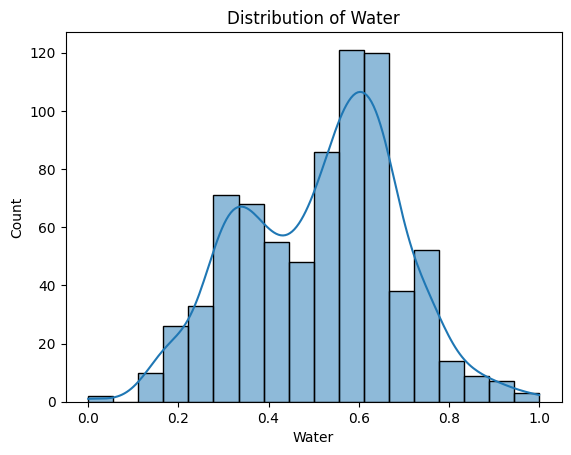

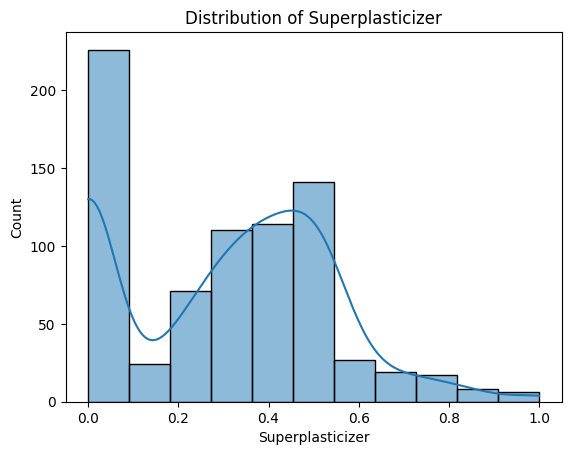

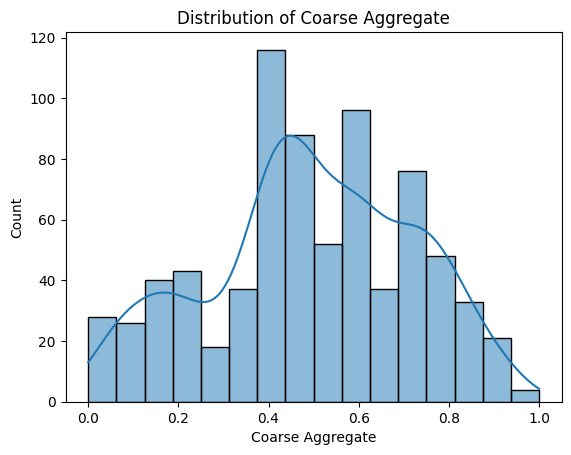

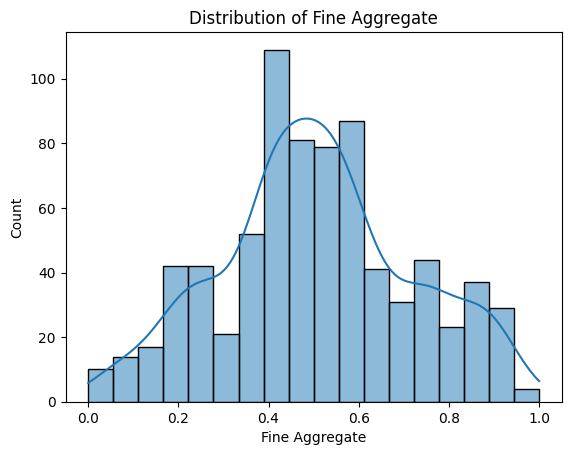

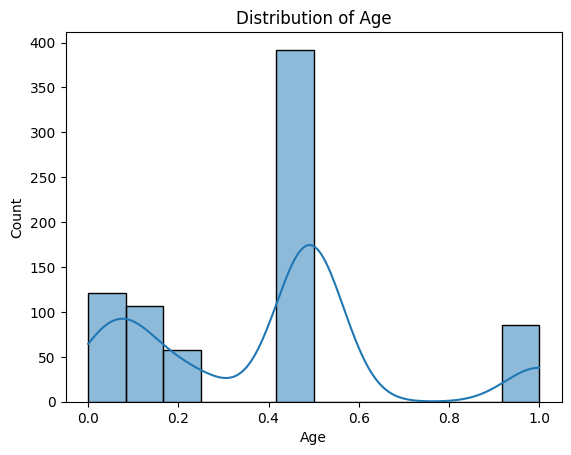

In [101]:
# Distribution of Features
for column in X_standardized_df.columns:
    sns.histplot(x=X_standardized_df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

**Remarks:** The distribution of the features are in an almost bell curved as the data shows to have higher counts in the middle point of the X axis.

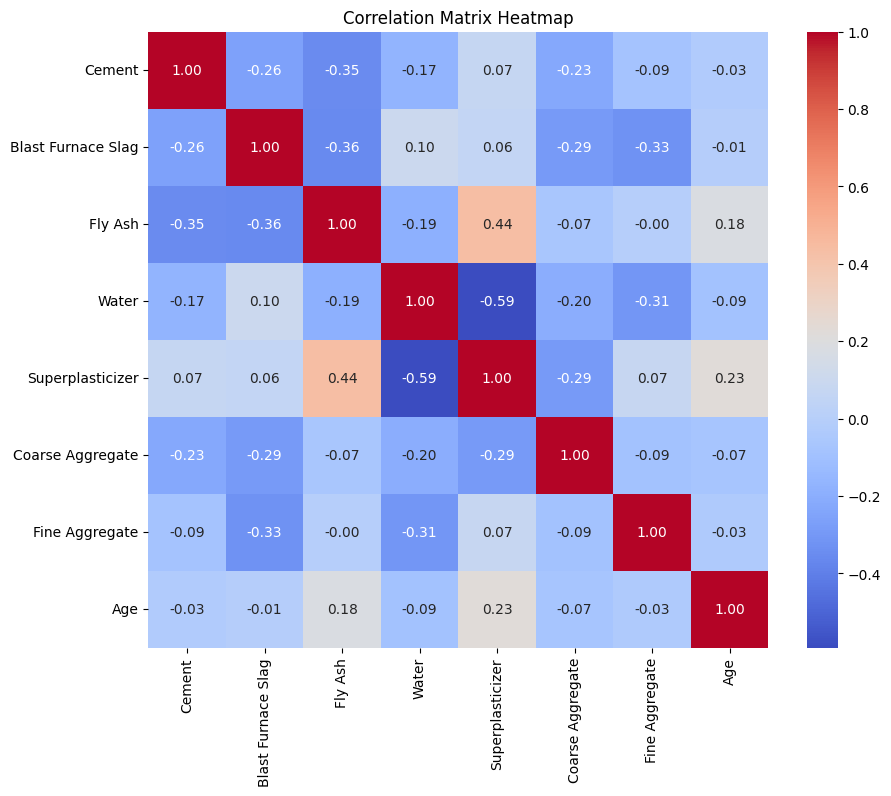

In [102]:
# Correlation Analysis
correlation_matrix = X_standardized_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [123]:
#Separate features and target variable
X = X_standardized_df.drop(['Coarse Aggregate', 'Fine Aggregate','Age','Water'],axis=1)
y = y_standardized_df['Concrete compressive strength']

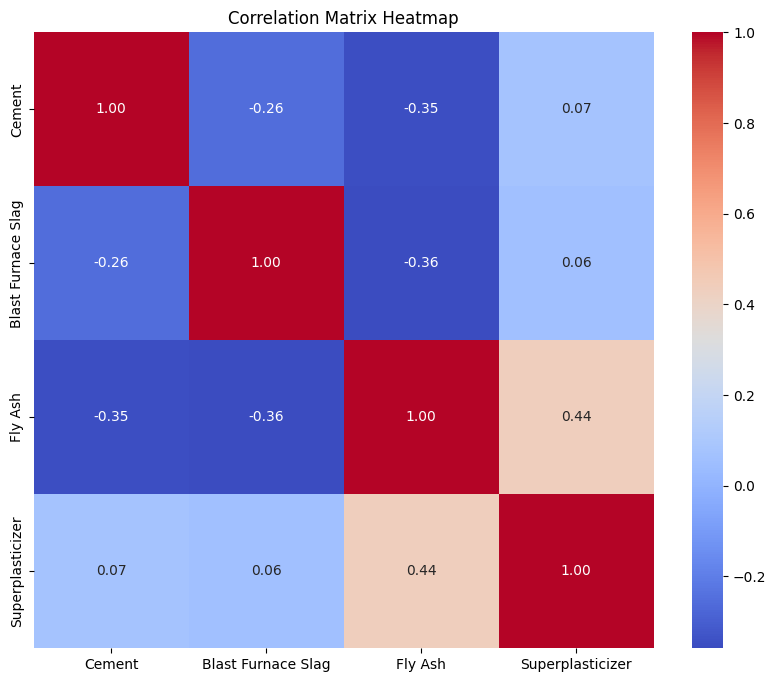

In [124]:
# Correlation Analysis
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Remarks:** Removal of columns that no correalation in the data.

##Regression Modeling

In [133]:
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(4, input_shape=(4,), kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [134]:
#evaluate model
estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=8)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold, scoring='neg_mean_squared_error')

Epoch 1/100
86/86 [==============================] - 1s 2ms/step - loss: 0.1275
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0304
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 7/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 8/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 9/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 10/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 11/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 12/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 13/100
86/86 [=================

In [135]:
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -0.02 (0.01) MSE


**Remarks:** The result reports the mean squared error including the average and standard deviation which the data can go through the unseen data after processing.

In [136]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=baseline_model, epochs=50, batch_size=8)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')

Epoch 1/50
86/86 [==============================] - 1s 3ms/step - loss: 0.1374
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0769
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 5/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 6/50
86/86 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 7/50
86/86 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 8/50
86/86 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 9/50
86/86 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 10/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 11/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 12/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 13/50
86/86 [==============================

In [137]:
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -0.03 (0.02) MSE


**Remarks:** even after running the standardized data this shows that the training model can handle the data regression at an excellent results

In [138]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(4, input_shape=(4,), kernel_initializer='normal', activation='relu'))
	model.add(Dense(2, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [141]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=larger_model, epochs=50, batch_size=8)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')

Epoch 1/50
86/86 [==============================] - 1s 2ms/step - loss: 0.1350
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 5/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 6/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 7/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 8/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 9/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 10/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 11/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 12/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 13/50
86/86 [==============================

In [142]:
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -0.03 (0.02) MSE


**Remarks:** The larger network achieves a mean squared error of -0.03 with a standard deviation of 0.02 which are the same with the baseline and standardized model which suggest that the large network is at least effective as in capturing the underlying patterns of the data.

In [145]:
def wider_model():
 # create model
 model = Sequential()
 model.add(Dense(20, input_shape=(4,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(1, kernel_initializer='normal'))
 # Compile model
 model.compile(loss='mean_squared_error', optimizer='adam')
 return model

In [146]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=wider_model, epochs=100, batch_size=8)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')

Epoch 1/100
86/86 [==============================] - 1s 2ms/step - loss: 0.0937
Epoch 2/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 3/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 6/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 7/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 8/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 9/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 10/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 11/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 12/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 13/100
86/86 [=================

In [147]:
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -0.03 (0.02) MSE


**Remarks:** The wider network also shows the same mean and standard deviation across the model which means as mention in the wider networks it is at least effective as in capturing the underlying patterns of the data.